## Isolation Forest algorithm

Isolation Forest, like any tree ensemble method, is built on the basis of decision trees. 
In these trees, partitions are created by first randomly selecting a feature and then selecting a random split value 
between the minimum and maximum value of the selected feature.
In principle, outliers are less frequent than regular observations 
and are different from them in terms of values (they lie further away from the regular observations in the feature space). 
That is why by using such random partitioning they should be identified closer to the root of the tree (shorter average path length, i.e., the number of edges an observation must pass in the tree going from the root to the terminal node), with fewer splits necessary.

In the following example we will use the ISO forest algorithm on a famous boston data set to detect the cities with the highest crime rate.

In [39]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [26]:
boston =load_boston()
names=list(boston['feature_names'])
X=boston['data']
df = pd.DataFrame(X, columns=names)

In [27]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [29]:
from sklearn.ensemble import IsolationForest

def iso_forest_detection(df, outliers_fraction, target_feature:str, plotting = True):
    x=df[target_feature].to_numpy().reshape(len(df[target_feature]),-1)
    model = IsolationForest(contamination=outliers_fraction)
    model.fit(x)
    predictions = model.predict(x) # anomalies are -1
    df[target_feature+'_anomalies'] = pd.Series(predictions, index = df.index)
    decision_function = model.decision_function(x)
    df['decision_function'] = pd.Series(decision_function, index = df.index)
    
    if plotting:
        a = df.loc[df[target_feature+'_anomalies'] == -1] #anomaly
        plt.figure(figsize=(6,6))
        plt.plot(df[target_feature], color='blue', label= f'original {target_feature}')
        plt.plot(a[target_feature], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
        plt.plot(df['decision_function'], color='green', label='decision function', alpha=0.3) # The anomaly score of the input samples.
        #             The lower, the more abnormal. Negative scores represent outliers,
        #             positive scores represent inliers.
        plt.xlabel('Rows')
        plt.ylabel(f'{target_feature}value')
        plt.title('Anomalies')
        plt.legend(loc='best')
        plt.show()
    return df

In [21]:
#Trying isolation forest

# Import IsolationForest
from sklearn.ensemble import IsolationForest
# Assume that 13% of the entire data set are anomalies
 
outliers_fraction = 0.01
x=df['CRIM'].to_numpy().reshape(506,-1)
model =  IsolationForest(contamination=outliers_fraction)
model.fit(x)
predictions = model.predict(x) # anomalies are -1
# predictions = predictions.reshape(2375,-1)
df['CRIM_anomalies'] = pd.Series(predictions, index = df.index)
decision_function = model.decision_function(x)
df['decision_function'] = pd.Series(decision_function, index = df.index)


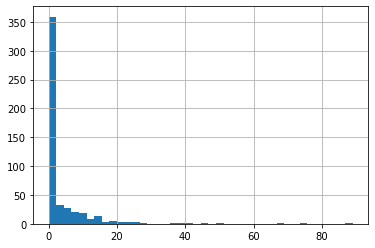

In [23]:
df['CRIM'].hist(bins=40);

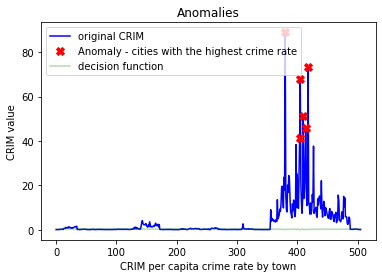

In [25]:
a = df.loc[df['CRIM_anomalies'] == -1] #anomaly
plt.figure(figsize=(6,4))
plt.plot(df['CRIM'], color='blue', label='original CRIM ')
plt.plot(a['CRIM'], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly - cities with the highest crime rate')
plt.plot(df['decision_function'], color='green', label='decision function', alpha=0.3) # The anomaly score of the input samples.
#             The lower, the more abnormal. Negative scores represent outliers,
#             positive scores represent inliers.
plt.xlabel('CRIM per capita crime rate by town')
plt.ylabel('CRIM value')
plt.title('Anomalies')
plt.legend(loc='best')
plt.show()

In [34]:
# cities with the highest crime rate
a['CRIM']

380    88.9762
404    41.5292
405    67.9208
410    51.1358
414    45.7461
418    73.5341
Name: CRIM, dtype: float64

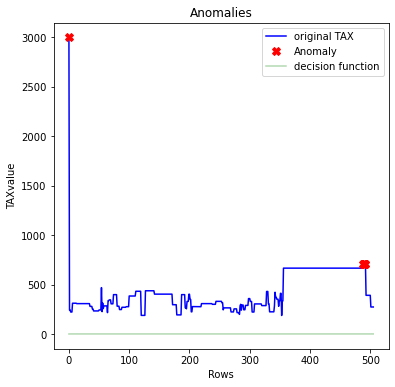

In [42]:
#now we try ISO FOREST for different outlier fraction and different target feature
# and we create fake outlier to the unrealistically high tax 
warnings.filterwarnings("ignore")
df['TAX'][0]=3000

outliers_fraction=0.01
df = iso_forest_detection(df, outliers_fraction, 'TAX', plotting=True)